In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import wilcoxon
from sklearn.metrics import matthews_corrcoef
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer

## Decision Tree 

In [2]:
def Decision_Tree(file_name):
    global DT_Scores
    global DT_accuracy
    Dataset = pd.read_csv(file_name)
    param_dist = {'max_depth':list(np.arange(1, 100, step=10)) + [None]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    tree = DecisionTreeClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10 , random_state=0) 
    mcc = make_scorer(matthews_corrcoef)
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=rfolds, return_train_score=True, scoring = mcc)
    tree_cv.fit(X,Y)
    DT_Scores = cross_val_score(tree_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    DT_accuracy = cross_val_score(tree_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
    print("Best MCC score is {}".format(DT_Scores.mean()))
    print("Best accuracy is {}".format(DT_accuracy.mean()))

## Random Forest

In [14]:
def Random_Forest(file_name):
    global RF_Scores
    global RF_Accuracy
    Dataset = pd.read_csv(file_name)
    param_dist = {'n_estimators': [100, 200, 300]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    rf = RandomForestClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10) 
    mcc = make_scorer(matthews_corrcoef)
    rf_cv = RandomizedSearchCV(rf, param_dist, cv=rfolds, scoring = mcc)
    rf_cv.fit(X,Y)
    RF_Scores = cross_val_score(rf_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    RF_Accuracy = cross_val_score(rf_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
    print("Best MCC score is {}".format(RF_Scores.mean()))
    print("Best accuracy is {}".format(RF_Accuracy.mean()))


## Logistic Regression

In [17]:
def Logistic_Regression(file_name):
    global LR_Scores
    global LR_Accuracy
    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset,random_state=0)
    param_dist = {'C': np.arange(0, 1, 0.01)}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    lr = LogisticRegression()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10) 
    mcc = make_scorer(matthews_corrcoef)
    lr_cv = RandomizedSearchCV(lr, param_dist, cv=rfolds, scoring = mcc)
    lr_cv.fit(X,Y)
    LR_Scores = cross_val_score(lr_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    LR_Accuracy = cross_val_score(lr_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(lr_cv.best_params_))
    print("Best MCC score is {}".format(LR_Scores.mean()))
    print("Best accuracy is {}".format(LR_Accuracy.mean()))

## Support Vector Machine

In [22]:
def SVM(file_name):
    global SVM_Scores
    global SVM_Accuracy
    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset,random_state=0)
    param_dist = {"C": [.01, .1, 1, 5, 10, 100],"gamma": [0, .01, .1, 1, 5, 10, 100]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    svm_clf = svm.SVC()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10) 
    mcc = make_scorer(matthews_corrcoef)
    svm_cv = RandomizedSearchCV(svm_clf, param_dist, cv=rfolds, scoring = mcc)
    svm_cv.fit(X,Y)
    SVM_Scores = cross_val_score(svm_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    SVM_Accuracy = cross_val_score(svm_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
    print("Best MCC score is {}".format(SVM_Scores.mean()))
    print("Best accuracy is {}".format(SVM_Accuracy.mean()))

## Multi-Layer Perceptron

In [28]:
def MLP(file_name):
    global MLP_Scores
    global MLP_Accuracy
    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset,random_state=0)
    param_dist = {"hidden_layer_sizes": [4, 8, 16, 32, 64, 100]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    mlp_clf = MLPClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10) 
    mcc = make_scorer(matthews_corrcoef)
    mlp_cv = RandomizedSearchCV(mlp_clf, param_dist, cv=rfolds, scoring = mcc)
    mlp_cv.fit(X,Y)
    MLP_Scores = cross_val_score(mlp_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    MLP_Accuracy = cross_val_score(mlp_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(mlp_cv.best_params_))
    print("Best MCC score is {}".format(MLP_Scores.mean()))
    print("Best accuracy is {}".format(MLP_Accuracy.mean()))

## Stochastic Gradient Descent

In [33]:
def SGD(file_name):
    global SGD_Scores
    global SGD_Accuracy
    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset,random_state=0)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    sgd_clf = SGDClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10) 
    mcc = make_scorer(matthews_corrcoef)
    SGD_Scores = cross_validate(sgd_clf,X,Y,cv = rfolds, scoring = mcc )
    SGD_Accuracy = cross_val_score(sgd_clf,X,Y,cv = rfolds)
    print("mcc: " , SGD_Scores['test_score'].mean())
    print ("accuracy: " , SGD_Accuracy.mean())

In [36]:
def wilcoxonTest(firstModelScore , secondModelScore):
    win , loss = " " , " "
    stat,p= wilcoxon(firstModelScore, secondModelScore, zero_method='zsplit')
    mean1 = firstModelScore.mean()
    mean2 =  secondModelScore.mean()
    alpha = 0.05
    if(p<=0.05):
        if(mean1>mean2):
            win = "Model1"
            loss = "Model2"
        else:
            win = "Model2"
            loss = "Model1"
        
    wilcoxonResults = {"winner: " : win , "losser: " : loss , "statics: ": stat , "p-Value: ": p } 
    return wilcoxonResults  

# Large Class Dataset 

In [3]:
Decision_Tree('Python_LargeClassSmell_Dataset_Scaled_GainRatio.csv')

Tuned Decision Tree Parameters: {'max_depth': 1}
Best MCC score is 0.701748896215141
Best accuracy is 0.9039


In [31]:
Random_Forest('Python_LargeClassSmell_Dataset_Scaled_GainRatio.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Tuned Decision Tree Parameters: {'n_estimators': 200}
Best MCC score is 0.773504223758373
Best accuracy is 0.9274000000000001


In [18]:
Logistic_Regression('Python_LargeClassSmell_Dataset_Scaled_GainRatio.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\

Tuned Decision Tree Parameters: {'C': 0.99}
Best MCC score is 0.5691903163172121
Best accuracy is 0.8766999999999999


In [23]:
SVM('Python_LargeClassSmell_Dataset_Scaled_GainRatio.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\

Tuned Decision Tree Parameters: {'gamma': 5, 'C': 100}
Best MCC score is 0.7548937517216215
Best accuracy is 0.9247


In [29]:
MLP('Python_LargeClassSmell_Dataset_Scaled_GainRatio.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\sit

Tuned Decision Tree Parameters: {'hidden_layer_sizes': 100}
Best MCC score is 0.7247578686866991
Best accuracy is 0.9179999999999999


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
SGD('Python_LargeClassSmell_Dataset_Scaled_GainRatio.csv')

mcc:  0.7009604571901724
accuracy:  0.9147


## Large Class Wilcoxon Test

In [38]:
wilcoxonTest(DT_Scores, RF_Scores)

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 861.5,
 'p-Value: ': 1.0672299998721774e-08}

In [40]:
wilcoxonTest(DT_Scores,LR_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 345.0,
 'p-Value: ': 6.601628228840007e-14}

In [42]:
wilcoxonTest(DT_Scores,SVM_Scores)

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 1216.0,
 'p-Value: ': 6.770756498974304e-06}

In [44]:
wilcoxonTest(DT_Scores,MLP_Scores)

{'winner: ': ' ',
 'losser: ': ' ',
 'statics: ': 2102.5,
 'p-Value: ': 0.1463080281172821}

In [46]:
wilcoxonTest(DT_Scores,SGD_Scores['test_score'])

{'winner: ': ' ',
 'losser: ': ' ',
 'statics: ': 2372.0,
 'p-Value: ': 0.598843678067999}

In [48]:
wilcoxonTest(RF_Scores,LR_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 42.0,
 'p-Value: ': 1.3727005199184006e-17}

In [49]:
wilcoxonTest(RF_Scores,SVM_Scores)

{'winner: ': ' ',
 'losser: ': ' ',
 'statics: ': 2020.0,
 'p-Value: ': 0.08249490454275968}

In [51]:
wilcoxonTest(RF_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1366.5,
 'p-Value: ': 6.795159007306288e-05}

In [52]:
wilcoxonTest(RF_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 944.5,
 'p-Value: ': 5.5016753895677764e-08}

In [53]:
wilcoxonTest(LR_Scores,SVM_Scores)

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 30.0,
 'p-Value: ': 9.5980682699822e-18}

In [55]:
wilcoxonTest(LR_Scores,MLP_Scores)

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 268.5,
 'p-Value: ': 8.584286820776657e-15}

In [56]:
wilcoxonTest(LR_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 320.0,
 'p-Value: ': 3.414331741281314e-14}

In [57]:
wilcoxonTest(SVM_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1812.5,
 'p-Value: ': 0.014292080866122676}

In [58]:
wilcoxonTest(SVM_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1367.5,
 'p-Value: ': 6.894874959177094e-05}

In [59]:
wilcoxonTest(MLP_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1909.0,
 'p-Value: ': 0.034172923520936725}

# Large Class Boxplot

In [60]:
#LargeClass
df=pd.DataFrame({'DT':DT_Scores,'RF':RF_Scores,'LR':LR_Scores,'SVM':SVM_Scores
                ,'MLP':MLP_Scores,'SGD':SGD_Scores['test_score']} )

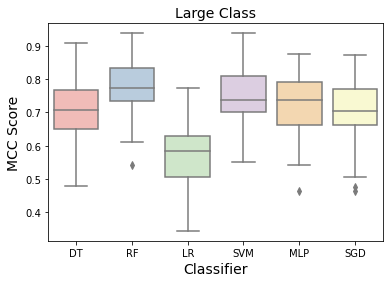

In [61]:
colors = ['#78C850',  '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
boxplot =sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")
boxplot.axes.set_title("Large Class", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("MCC Score", fontsize=14)
plt.show()

In [62]:
#LargeClass
df=pd.DataFrame({'DT':DT_accuracy,'RF':RF_Accuracy,'LR':LR_Accuracy,'SVM':SVM_Accuracy
                ,'MLP':MLP_Accuracy,'SGD':SGD_Accuracy} )

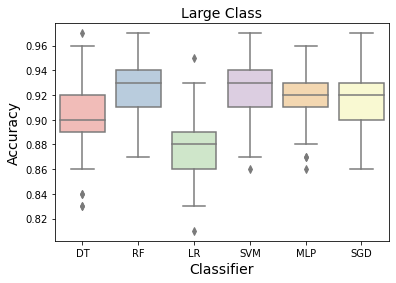

In [63]:
boxplot =sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")
boxplot.axes.set_title("Large Class", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("Accuracy", fontsize=14)
plt.show()

# Long Method Dataset 

In [64]:
Decision_Tree('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

Tuned Decision Tree Parameters: {'max_depth': 1}
Best MCC score is 0.8968829285876538
Best accuracy is 0.9597440699126093


In [65]:
Random_Forest('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Tuned Decision Tree Parameters: {'n_estimators': 200}
Best MCC score is 0.875296785720118
Best accuracy is 0.9550312109862673


In [72]:
Logistic_Regression('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\

Tuned Decision Tree Parameters: {'C': 0.99}
Best MCC score is 0.5476916919152466
Best accuracy is 0.8529138576779025


In [73]:
SVM('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\

Tuned Decision Tree Parameters: {'gamma': 5, 'C': 10}
Best MCC score is 0.8193082817550621
Best accuracy is 0.9371548064918852


In [76]:
MLP('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\sit

Tuned Decision Tree Parameters: {'hidden_layer_sizes': 100}
Best MCC score is 0.7074517079221869
Best accuracy is 0.902359550561798


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [77]:
SGD('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

mcc:  0.7310678630455435
accuracy:  0.9085880149812736


## Long Method Wilcoxon Test

In [78]:
wilcoxonTest(DT_Scores,RF_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1787.5,
 'p-Value: ': 0.011216252296741568}

In [79]:
wilcoxonTest(DT_Scores,LR_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.896120241954008e-18}

In [80]:
wilcoxonTest(DT_Scores,SVM_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 468.5,
 'p-Value: ': 1.5390376532709843e-12}

In [81]:
wilcoxonTest(DT_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 20.0,
 'p-Value: ': 7.114706510088972e-18}

In [83]:
wilcoxonTest(DT_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 21.5,
 'p-Value: ': 7.444188710721731e-18}

In [84]:
wilcoxonTest(RF_Scores,LR_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.895021439772567e-18}

In [85]:
wilcoxonTest(RF_Scores,SVM_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1030.5,
 'p-Value: ': 2.7679956607866263e-07}

In [86]:
wilcoxonTest(RF_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 92.0,
 'p-Value: ': 5.988565522888214e-17}

In [87]:
wilcoxonTest(RF_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 198.5,
 'p-Value: ': 1.2516637136550123e-15}

In [223]:
wilcoxonTest(LR_Scores,SVM_Scores)

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 9.0,
 'p-Value: ': 5.11254534956045e-18}

In [88]:
wilcoxonTest(LR_Scores,MLP_Scores)

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 290.0,
 'p-Value: ': 1.5336099183319005e-14}

In [89]:
wilcoxonTest(LR_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 206.5,
 'p-Value: ': 1.5642779054081943e-15}

In [90]:
wilcoxonTest(SVM_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 430.5,
 'p-Value: ': 5.951790368262153e-13}

In [91]:
wilcoxonTest(SVM_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 660.5,
 'p-Value: ': 1.4479015009137305e-10}

In [92]:
wilcoxonTest(MLP_Scores,SGD_Scores['test_score'])

{'winner: ': ' ',
 'losser: ': ' ',
 'statics: ': 2048.0,
 'p-Value: ': 0.10098304610878957}

# Long Method Boxplot

In [93]:
#LongMethod
df=pd.DataFrame({'DT':DT_Scores,'RF':RF_Scores,'LR':LR_Scores,'SVM':SVM_Scores
                ,'MLP':MLP_Scores,'SGD':SGD_Scores['test_score']} )

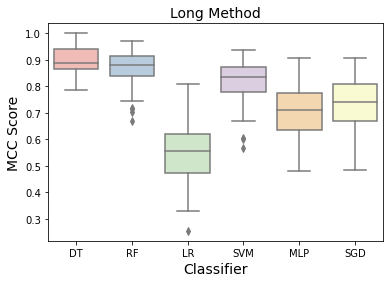

In [94]:
boxplot =sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")
boxplot.axes.set_title("Long Method", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("MCC Score", fontsize=14)
plt.show()

In [95]:
#LongMethod
df=pd.DataFrame({'DT':DT_accuracy,'RF':RF_Accuracy,'LR':LR_Accuracy,'SVM':SVM_Accuracy
                ,'MLP':MLP_Accuracy,'SGD':SGD_Accuracy} )

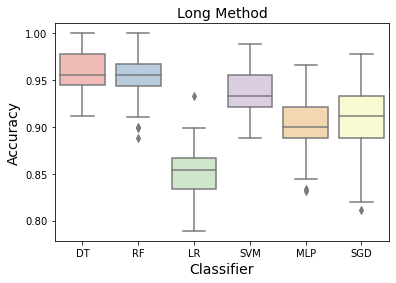

In [96]:
boxplot =sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")
boxplot.axes.set_title("Long Method", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("Accuracy", fontsize=14)
plt.show()